<a href="https://colab.research.google.com/github/Mahdi-0599/NLP-HATESPEECH/blob/master/hatespeech_nlp_with_disaster_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Kernel I Tried to Maximize the Accuracy using Neural Networks 


In [ ]:
import numpy as np
import pandas as pd 
# Matplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import f1_score

# Keras
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import  Activation, add , GlobalMaxPooling1D , GlobalAveragePooling1D , Dense , Dropout, Embedding,Flatten , Conv1D, MaxPooling1D , LSTM , GRU, SpatialDropout1D ,Bidirectional ,Input , concatenate
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model

# nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re ,os , time , itertools , gc , json , gensim ,multiprocessing ,string
import tensorflow_hub as hub
from scipy import sparse

from collections import Counter

print("No. of Processors are ",multiprocessing.cpu_count())
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Using TensorFlow backend.


No. of Processors are  4
/kaggle/input/a-real-disaster-leaked-label/__results__.html
/kaggle/input/a-real-disaster-leaked-label/__notebook__.ipynb
/kaggle/input/a-real-disaster-leaked-label/__resultx__.html
/kaggle/input/a-real-disaster-leaked-label/custom.css
/kaggle/input/a-real-disaster-leaked-label/submission.csv
/kaggle/input/a-real-disaster-leaked-label/__output__.json
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin
/kaggle/input/twitter-hate-speech/test_tweets_anuFYb8.csv
/kaggle/input/tw

If you want to clear the text , set 
> use_filter = True 

inside the DataPrepare otherwise set it to False as it will take 10 Minutes to Filter.

In [ ]:
def clean(tweet):    
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
class DataPrepare(object):
    def __init__(self, path_train='/kaggle/input/nlp-getting-started/train.csv' , is_test = True , path_test='/kaggle/input/nlp-getting-started/test.csv' , 
                 path_submit= '/kaggle/input/nlp-getting-started/sample_submission.csv' , path_leaked = '/kaggle/input/a-real-disaster-leaked-label/submission.csv' ,
                 use_stemmer = False, use_filter = True , path_2 = None , use_pretraining = False ,use_tokenizer = True, 
                 clear_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z]+" ,min_cv_value = 5,drop_duplicates = True):
        self.path_train = path_train # Train Data Path
        self.is_test = is_test
        if self.is_test: 
            self.path_test = path_test # Test Data Path
        self.path_submit = path_submit # Submit Path
        self.pretrain = use_pretraining # If you want to use Pretraining to use as Word Embedding . I have used Google word Embedding as That will be faster.
        self.path_2 = path_2 # for Pretraining
        self.train_data = pd.read_csv(path_train) # Reading the train File
        if self.is_test: 
            self.test_data = pd.read_csv(path_test) # Reading the test File
        self.submit_data = pd.read_csv(path_submit) # Reading the submit file
        self.leaked_data = pd.read_csv(path_leaked) # Leaked Result as they are only used to evaluate and not used anywhere while training the model
        self.clear_re = clear_re # Regex Pattern you want to use to clean the Text 
        self.stop_words = stopwords.words("english") # Stopwords you want to use 
        self.stemmer = SnowballStemmer("english") # Stemmer you want to use 
        self.use_filter = use_filter # whether you want to use regex Filters to filter Text (Take 10 minutes to Prepare Data, Set to True only while Commiting) 
        self.use_stemmer = use_stemmer # whether to use stemmer
        self.use_tokenizer = use_tokenizer # Whether you want use defined Tokenizer in function if set to True
        self.hashtags_filter = re.compile(r"#(\w+)") # Regex Filter to filter Hashtags
        self.at_filter = re.compile(r"@(\w+)") # Regex filter to filter @
        self.url_filter = re.compile(r"http:\/\/t.co\/(\w+)") # Regex filter to filter URL
        self.drop_duplicates = drop_duplicates # Whether you want to drop the duplicates (Taken from other Kernel)
        self.duplicates = [246,270,266,259,253,251,250,271,3930,3933,3924,3917,3136, 3133,3913,3914,3936,3921,3941,
                           3937,3938,3667,3674,3688,3696,601,576,584,608,606,603,592,604,591, 587,6828,6831,4415, 
                           4400, 4399,4403,4397,4396, 4394,4414, 4393,4392,4404,4407,4420,4412,4408,4391,4405,6840,6834,6837,6841,6816]# Duplicate Index
        if self.drop_duplicates:# If drop_duplicates is True the Drop the Indexes
            self.drop_dup()
        self.get_hashtags() #Get all the Hashtags from the Text and save them in other Columns
        self.get_urls() #Get all the Urls from the Text and save them in other Columns
        self.get_ats() #Get all the @ from the Text and save them in other Columns
        self.clear_keyword() # Clear the Keywords and Locations  and save them in columns using regex Pattern
        self.c_vector = CountVectorizer(min_df = min_cv_value , max_df = 0.7 , lowercase=False , ngram_range = (1,3)) # Defining the CV to Vectorize the Texts to Vectors
        if self.pretrain: # Not Implemented (Used Google Word Embedding Instead)
            # Althrough it is added , it is not coded yet
            self.sentiment =  pd.read_csv(path_2, encoding='latin-1', names=['target','id','date','flag','user','text'])
            self.sentiment.drop(columns = ['id','date','flag','user'] , inplace = True)
            self.sentiment.target.replace({0:1 , 4:0} , inplace = True)
        self.clear_text() # Clear the text and save them in text_re column using clear_re regex Pattern
        self.vector_values(columns = ['keyword' , 'location','hashtags' , 'urls' , 'ats' ,'text_re']) # Vectorize the columns usign CountVectorizer
        if not self.is_test:
            self.train_df_gaf  = self.get_additional_features(self.train_df)
        else:
            self.train_df_gaf , self.test_df_gaf = self.get_additional_features(self.train_df , self.test_df) # Get the Additional Features from using the Unsupervised Learning Techniques
        
        if use_tokenizer: # Tokenize the Text 
            self.tokenizer = Tokenizer()
            self.train_tokenizer()
        self.data_max_len() # Get the  Length of Text in Training and Test file in each row
        if not self.is_test:
            self.SEQUENCE_LENGTH = self.train_data.text_size.max()
        else:
            self.SEQUENCE_LENGTH = max(self.train_data.text_size.max() , self.test_data.text_size.max()) # Get the Max Of both 
    
    def drop_dup(self):
        # This will Drop the Duplicates from the training data
        # https://www.kaggle.com/dmitri9149/transformer-svm-semantically-identical-tweets
        self.train_data.drop(index = self.duplicates , inplace = True)
    def preprocess(self , text):
        # Preprocess the cleaning sequence and apply Stemmer
        text = re.sub(self.clear_re, ' ', str(text).lower()).strip()
        tokens = []
        for token in text.split():
            if token not in self.stop_words:
                if self.use_stemmer:
                    tokens.append(self.stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)
    
    def preprocess_keyword(self , text):
        # Using to Preprocessing the Keyword and Location in train and test
        text = str(text).replace("%20" , " ")
        text = text.replace(" ","_")
        text = re.sub("[^A-Za-z_ ]", ' ', str(text).lower()).strip()
        return text
    
    def get_additional_features(self , train , test = None , ID = False):
        # Getting the Addiotional Featurtes by compressing the train_df and test_df to 60 Features
        
        train_new = pd.DataFrame(index = self.train_df.index)
        if self.is_test:
            test_new = pd.DataFrame(index = self.test_df.index)
        col = list(train.columns)
        n_comp = 12
        #TSVD
        tsvd = TruncatedSVD(n_components = n_comp  , random_state = 1)
        tsvd_result_train = tsvd.fit_transform(train[col])
        if self.is_test:
            tsvd_result_test = tsvd.transform(test[col])
        #PCA
        pca = PCA(n_components = n_comp , random_state = 1)
        pca_result_train = pca.fit_transform(train[col])
        if self.is_test:
            pca_result_test = pca.transform(test[col])
        #FICA
        ica = FastICA(n_components =n_comp , random_state = 1)
        ica_result_train = ica.fit_transform(train[col])
        if self.is_test:
            ica_result_test = ica.transform(test[col])
        #GRP
        grp = GaussianRandomProjection(n_components = n_comp , random_state = 1)
        grp_result_train = grp.fit_transform(train[col])
        if self.is_test:
            grp_result_test = grp.transform(test[col])
        #SRP
        srp = SparseRandomProjection(n_components = n_comp , random_state = 1 , dense_output =True )
        srp_result_train = srp.fit_transform(train[col])
        if self.is_test:
            srp_result_test = srp.transform(test[col])
        for i in range(1,n_comp+1):
            train_new['tsvd_' + str(i)] = tsvd_result_train[:, i - 1]
            train_new['pca_' + str(i)] = pca_result_train[:, i - 1]
            train_new['ica_' + str(i)] = ica_result_train[:, i - 1]
            train_new['grp_' + str(i)] = grp_result_train[:, i - 1]
            train_new['srp_' + str(i)] = srp_result_train[:, i - 1]
            if self.is_test:
                test_new['ica_' + str(i)] = ica_result_test[:, i - 1]
                test_new['tsvd_' + str(i)] = tsvd_result_test[:, i - 1]
                test_new['grp_' + str(i)] = grp_result_test[:, i - 1]
                test_new['srp_' + str(i)] = srp_result_test[:, i - 1]
                test_new['pca_' + str(i)] = pca_result_test[:, i - 1]
        if self.is_test:
            return train_new ,test_new
        return train_new
    def vector_values(self , columns):
        # Vectorize the values and fitting the values 
        self.train_df = pd.DataFrame(index = self.train_data.index)
        if self.is_test:
            self.test_df = pd.DataFrame(index = self.test_data.index)
        for col in columns:
            if self.is_test:
                self.test_df = self.test_df.join(pd.DataFrame(self.c_vector.fit_transform(self.test_data[col].fillna('None')).toarray(),columns = self.c_vector.get_feature_names(),index= self.test_df.index , dtype = bool).add_prefix(col+'_'))
                self.train_df = self.train_df.join(pd.DataFrame(self.c_vector.transform(self.train_data[col].fillna('None')).toarray(),columns = self.c_vector.get_feature_names(),index= self.train_df.index, dtype = bool).add_prefix(col+'_'))
            else:
                self.train_df = self.train_df.join(pd.DataFrame(self.c_vector.fit_transform(self.train_data[col].fillna('None')).toarray(),columns = self.c_vector.get_feature_names(),index= self.train_df.index, dtype = bool).add_prefix(col+'_'))
    def get_hashtags(self):
        # Getting the Hashtags in train_data and test_data
        self.train_data['hashtags'] = self.train_data.text.apply(lambda x : str(self.hashtags_filter.findall(str(x).lower())))
        if self.is_test:
            self.test_data['hashtags'] = self.test_data.text.apply(lambda x : str(self.hashtags_filter.findall(str(x).lower())))
        
    def get_urls(self):
        # Getting the URLs in trian_data and test_data
        self.train_data['urls'] = self.train_data.text.apply(lambda x : str(self.url_filter.findall(str(x))))
        if self.is_test:
            self.test_data['urls'] = self.test_data.text.apply(lambda x : str(self.url_filter.findall(str(x))))
        
    def get_ats(self):
        # Getting the @ in train_data and test_data
        self.train_data['ats'] = self.train_data.text.apply(lambda x : str(self.at_filter.findall(str(x).lower())))
        if self.is_test:
            self.test_data['ats'] = self.test_data.text.apply(lambda x : str(self.at_filter.findall(str(x).lower())))
 
    def clear_keyword(self):
        # Clearning the test and Train keywords and locations with preprocess_keyword function in self
        self.train_data.keyword = self.train_data.keyword.apply(lambda x: self.preprocess_keyword(x)) 
        self.train_data.location = self.train_data.location.apply(lambda x: self.preprocess_keyword(x)) 
        if self.is_test:
            self.test_data.keyword = self.test_data.keyword.apply(lambda x: self.preprocess_keyword(x)) 
            self.test_data.location = self.test_data.location.apply(lambda x: self.preprocess_keyword(x))
        
    def clear_text(self):
        # usign the Multi Regex Filters to further filer out text to text_re
        if self.use_filter:
            self.train_data['text_re'] = self.train_data.text.apply(lambda x: clean(x))
            self.train_data['text_re'] = self.train_data.text_re.apply(lambda x: remove_emoji(x))
            self.train_data['text_re'] = self.train_data.text_re.apply(lambda x: self.preprocess(x))
            if self.is_test:
                self.test_data['text_re'] = self.test_data.text.apply(lambda x: clean(x))
                self.test_data['text_re'] = self.test_data.text_re.apply(lambda x: remove_emoji(x))
                self.test_data['text_re'] = self.test_data.text_re.apply(lambda x: self.preprocess(x))
        else:
            self.train_data['text_re'] = self.train_data.text.apply(lambda x: self.preprocess(x))
            if self.is_test:
                self.test_data['text_re'] = self.test_data.text.apply(lambda x: self.preprocess(x))
        
    def train_tokenizer(self):
        # Getting the Tokenizer to Fit on text in train and test data
        if self.is_test:
            self.tokenizer.fit_on_texts(pd.concat([self.train_data['text_re'] , self.test_data['text_re']] ,axis = 0))
        # Setting the Vocab size
        else:
            self.tokenizer.fit_on_texts(self.train_data['text_re'])
        self.vocab_size = len(self.tokenizer.word_index)+1
        
    def data_max_len(self):
        # Getting the max Size in each row
        self.train_data['text_size'] = self.train_data.text_re.apply(lambda x: len(x.split(' ')))
        if self.is_test:
            self.test_data['text_size'] = self.test_data.text_re.apply(lambda x: len(x.split(' ')))
            
class DataPrepare_Sentiment(object):
    def __init__(self, path_train='/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv' 
                 ,use_tokenizer = True ,is_test= False,  clear_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z]+" ,min_cv_value = 100,
                 drop_duplicates = True ,sl = 30 ,use_filter = False , use_stemmer = False , is_preprocess = False,nrows = None ):
        self.path_train = path_train # Train Data Path
        print('Reading Dataset ..')
        self.train_data = pd.read_csv(path_train , encoding= "ISO-8859-1" , names=['target','id','date','flag','user','text']) # Reading the train File
        print('Reading Done .. ')
        if nrows is not None:
            self.train_data = self.train_data.sample(nrows)
        self.train_data.drop(columns = ['id','date','flag','user'] , inplace = True)
        self.train_data.target.replace({0:1 , 4:0} , inplace = True)
        self.is_test = is_test
        self.clear_re = clear_re # Regex Pattern you want to use to clean the Text 
        self.stop_words = stopwords.words("english") # Stopwords you want to use 
        self.stemmer = SnowballStemmer("english") # Stemmer you want to use 
        self.use_filter = use_filter # whether you want to use regex Filters to filter Text (Take 10 minutes to Prepare Data, Set to True only while Commiting) 
        self.use_stemmer = use_stemmer # whether to use stemmer
        self.use_tokenizer = use_tokenizer # Whether you want use defined Tokenizer in function if set to True
        self.hashtags_filter = re.compile(r"#(\w+)") # Regex Filter to filter Hashtags
        self.at_filter = re.compile(r"@(\w+)") # Regex filter to filter @
        self.url_filter = re.compile(r"http:\/\/t.co\/(\w+)") # Regex filter to filter URL
        self.is_preprocess = is_preprocess
        print('Getting # , @ , URLs .. ')
        self.get_hashtags() #Get all the Hashtags from the Text and save them in other Columns
        self.get_urls() #Get all the Urls from the Text and save them in other Columns
        self.get_ats() #Get all the @ from the Text and save them in other Columns
        print('Done')
        self.c_vector = CountVectorizer(min_df = min_cv_value ,lowercase=False) # Defining the CV to Vectorize the Texts to Vectors
        print('Clearnig Text')
        self.clear_text() # Clear the text and save them in text_re column using clear_re regex Pattern
        print('Vectorizing Values')
        self.vector_values(columns = ['hashtags' , 'ats' ,'text_re']) # Vectorize the columns usign CountVectorizer
        self.train_df_gaf  = self.get_additional_features(self.train_df)
        if use_tokenizer: # Tokenize the Text 
            print('Tokenizing .. ')
            self.tokenizer = Tokenizer()
            self.train_tokenizer()
        self.data_max_len() # Get the  Length of Text in Training and Test file in each row
        self.SEQUENCE_LENGTH = sl
        self.remove_bigies()
    def preprocess(self , text):
        # Preprocess the cleaning sequence and apply Stemmer
        text = re.sub(self.clear_re, ' ', str(text).lower()).strip()
        if self.is_preprocess:
            tokens = []
            for token in text.split():
                if token not in self.stop_words:
                    if self.use_stemmer:
                        tokens.append(self.stemmer.stem(token))
                    else:
                        tokens.append(token)
            return " ".join(tokens)
        else:
            return text
    def preprocess_keyword(self , text):
        # Using to Preprocessing the Keyword and Location in train and test
        text = str(text).replace("%20" , " ")
        text = text.replace(" ","_")
        text = re.sub("[^A-Za-z_ ]", ' ', str(text).lower()).strip()
        return text
    
    def get_additional_features(self , train ):
        # Getting the Addiotional Featurtes by compressing the train_df and test_df to 60 Features
        train_new = pd.DataFrame(index = self.train_df.index)
        col = list(train.columns)
        n_comp = 12
        #TSVD
        tsvd = TruncatedSVD(n_components = n_comp  , random_state = 1)
        tsvd_result_train = tsvd.fit_transform(train[col])
        #PCA
        pca = PCA(n_components = n_comp , random_state = 1)
        pca_result_train = pca.fit_transform(train[col])
        #FICA
        ica = FastICA(n_components =n_comp , random_state = 1)
        ica_result_train = ica.fit_transform(train[col])
        #GRP
        grp = GaussianRandomProjection(n_components = n_comp , random_state = 1)
        grp_result_train = grp.fit_transform(train[col])
        #SRP
        srp = SparseRandomProjection(n_components = n_comp , random_state = 1 , dense_output =True )
        srp_result_train = srp.fit_transform(train[col])
        for i in range(1,n_comp+1):
            train_new['tsvd_' + str(i)] = tsvd_result_train[:, i - 1]
            train_new['pca_' + str(i)] = pca_result_train[:, i - 1]
            train_new['ica_' + str(i)] = ica_result_train[:, i - 1]
            train_new['grp_' + str(i)] = grp_result_train[:, i - 1]
            train_new['srp_' + str(i)] = srp_result_train[:, i - 1]
        return train_new
    def vector_values(self , columns):
        # Vectorize the values and fitting the values 
        self.train_df = pd.DataFrame(index = self.train_data.index)
        for col in columns:
            self.train_df = self.train_df.join(pd.DataFrame(self.c_vector.fit_transform(self.train_data[col].fillna('None')).toarray(),columns = self.c_vector.get_feature_names(),index= self.train_df.index, dtype = bool).add_prefix(col+'_'))
    def get_hashtags(self):
        # Getting the Hashtags in train_data and test_data
        self.train_data['hashtags'] = self.train_data.text.apply(lambda x : str(self.hashtags_filter.findall(str(x).lower())))

    def get_urls(self):
        # Getting the URLs in trian_data and test_data
        self.train_data['urls'] = self.train_data.text.apply(lambda x : str(self.url_filter.findall(str(x))))
 
    def get_ats(self):
        # Getting the @ in train_data and test_data
        self.train_data['ats'] = self.train_data.text.apply(lambda x : str(self.at_filter.findall(str(x).lower())))

    def clear_text(self):
        # usign the Multi Regex Filters to further filer out text to text_re
        if self.use_filter:
            self.train_data['text_re'] = self.train_data.text.apply(lambda x: clean(x))
            self.train_data['text_re'] = self.train_data.text_re.apply(lambda x: remove_emoji(x))
            self.train_data['text_re'] = self.train_data.text_re.apply(lambda x: self.preprocess(x))
        else:
            self.train_data['text_re'] = self.train_data.text.apply(lambda x: self.preprocess(x))

    def train_tokenizer(self):
        # Getting the Tokenizer to Fit on text in train and test data
        self.tokenizer.fit_on_texts(self.train_data['text_re'])
        self.vocab_size = len(self.tokenizer.word_index)+1
        
    def data_max_len(self):
        # Getting the max Size in each row
        self.train_data['text_size'] = self.train_data.text_re.apply(lambda x: len(x.split(' ')))
    
    def remove_bigies(self):
        remove = self.train_data.text_size <= self.SEQUENCE_LENGTH
        self.train_data = self.train_data[remove]
        self.train_df = self.train_df[remove]
        self.train_df_gaf = self.train_df_gaf[remove]

In [ ]:
%%time
data = DataPrepare(use_filter = True , is_test= True)
# data = DataPrepare_Sentiment(min_cv_value = 5 ,nrows = 10000 ,is_test = False) # This class is prepared for smaller datasets without test and validation like genral Sentiment Datasets.
EPOCHS = 10
BATCH_SIZE = 128
W2V_SIZE = 100

CPU times: user 10min 38s, sys: 10.9 s, total: 10min 49s
Wall time: 10min 9s


In [ ]:
%%time 
x_data = pad_sequences(data.tokenizer.texts_to_sequences(data.train_data.text_re) , maxlen = data.SEQUENCE_LENGTH)
y_data = data.train_data.target
y_data = y_data.values.reshape(-1,1)
if data.is_test:
    x_test = pad_sequences(data.tokenizer.texts_to_sequences(data.test_data.text_re) , maxlen = data.SEQUENCE_LENGTH)

CPU times: user 363 ms, sys: 0 ns, total: 363 ms
Wall time: 363 ms


In [ ]:
%%time
# Getting the Google Pretrained Embedding Gensium Model and getting Embedding of words in layers
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)  
embedding_matrix = np.zeros((data.vocab_size , W2V_SIZE))
word_counter = 0
for word , i in data.tokenizer.word_index.items():
    if word in w2v_model.wv:
        word_counter += 1
        embedding_matrix[i] = w2v_model.wv[word]
print('Embedding Matrix Shape - > ', embedding_matrix.shape)
print('Number of Words found in Embedding Layers are' , word_counter)
print('The Ratio of words Found is ' , word_counter/embedding_matrix.shape[0])

ValueError: could not broadcast input array from shape (300) into shape (100)

In [ ]:
del w2v_model
gc.collect()

0

In [ ]:
%%time
# Getting the Embedding of each Sentence with Google Universal Encoder 
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
x_train_embeddings = embed(data.train_data.text_re)
if data.is_test:
    x_test_embeddings = embed(data.test_data.text_re)

CPU times: user 3min 50s, sys: 40.1 s, total: 4min 30s
Wall time: 2min 3s


In [ ]:
del embed
gc.collect()

4

MAX_LEN = 300
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS

def build_model():

    words = Input(shape=(data.SEQUENCE_LENGTH,), name='User_Input')
    x =Embedding( data.vocab_size , W2V_SIZE , weights = [embedding_matrix] , input_length = data.SEQUENCE_LENGTH, trainable = False , name = 'LSTM_Embedding_Layer')(words)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True))(x)
    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
   
    model = Model(inputs=words, outputs=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
model_1 = build_model()
plot_model(model_1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Defining the Model

def define_model(layer_activation = 'relu' , final_activation = 'sigmoid' , global_dropout = 0.5):
    # BiDirectional LSTM layer with Embedding 
    lstm_input = Input(shape=(data.SEQUENCE_LENGTH,), name='User_Input')
    lstm_embedding = Embedding( data.vocab_size , W2V_SIZE , weights = [embedding_matrix] , input_length = data.SEQUENCE_LENGTH, trainable = False , name = 'LSTM_Embedding_Layer')(lstm_input)
    lstm_spatial = SpatialDropout1D(global_dropout)(lstm_embedding)
    lstm_bi_layer = Bidirectional(LSTM(128 , dropout=global_dropout, recurrent_dropout=global_dropout ,name = 'LSTM_Bi_Layer' , return_sequences = True))(lstm_spatial)
    lstm_bi_layer_con = concatenate([ GlobalMaxPooling1D()(lstm_bi_layer),GlobalAveragePooling1D()(lstm_bi_layer)], name='Concatenation_Layer_LSTM')
    # lstm_dense_layer = Dense(128 , activation = layer_activation)(lstm_bi_layer)
    
    # Neural Network to Take Word Vecors
    df_input = Input(shape = (data.train_df.shape[1],) , name = 'DF_Input')
    df_dense_layer = Dense(data.train_df.shape[1], activation = layer_activation)(df_input)
    df_dropout = Dropout(global_dropout)(df_dense_layer)
    df_dense_layer_2 = Dense(128, activation = layer_activation)(df_dropout)
    
    # Neural Network for Google Sentence Encoder
    df_embed = Input(shape = (x_train_embeddings.shape[1],) , name = 'DF_Embedding')
    df_dense_embed_layer = Dense(x_train_embeddings.shape[1], activation = layer_activation)(df_embed)
    df_dropout_embed = Dropout(global_dropout)(df_dense_embed_layer)
    df_dense_embed_layer_2 = Dense(128, activation = layer_activation)(df_dropout_embed)
    
    # Neural Network for Addtional Features 
    df_gaf = Input(shape = (data.train_df_gaf.shape[1],) ,name = 'DF_GAF')
    df_dense_gaf_layer = Dense(data.train_df_gaf.shape[1], activation = layer_activation)(df_gaf)
    df_dropout_gaf = Dropout(global_dropout)(df_dense_gaf_layer)
    df_dense_gaf_layer_2 = Dense(60, activation = layer_activation)(df_dropout_gaf)
    
    # Merging all the Layers 
    merged_vectors = concatenate([df_dense_gaf_layer_2 , df_dense_embed_layer_2, df_dense_layer_2, lstm_bi_layer_con], name='Concatenation_Layer')
#     merged_dropout = Dropout(global_dropout)(merged_vectors)
#     merged_dense = Dense(128, activation = layer_activation)(merged_dropout)
    merged_dropout_2 = Dropout(global_dropout)(merged_vectors)
    merged_dense_2 = add([merged_dropout_2, Dense(828, activation=layer_activation)(merged_dropout_2)])
    merged_dense_3 = add([merged_dense_2, Dense(828, activation=layer_activation)(merged_dense_2)])
    merged_output = Dense(1, activation = final_activation)(merged_dense_3)

    model = Model([df_gaf , df_embed , df_input, lstm_input], merged_output)
    return model


In [ ]:
model = define_model()
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) 
model.compile(loss = 'binary_crossentropy' , optimizer = adam , metrics = ['accuracy' , 'mse'] )

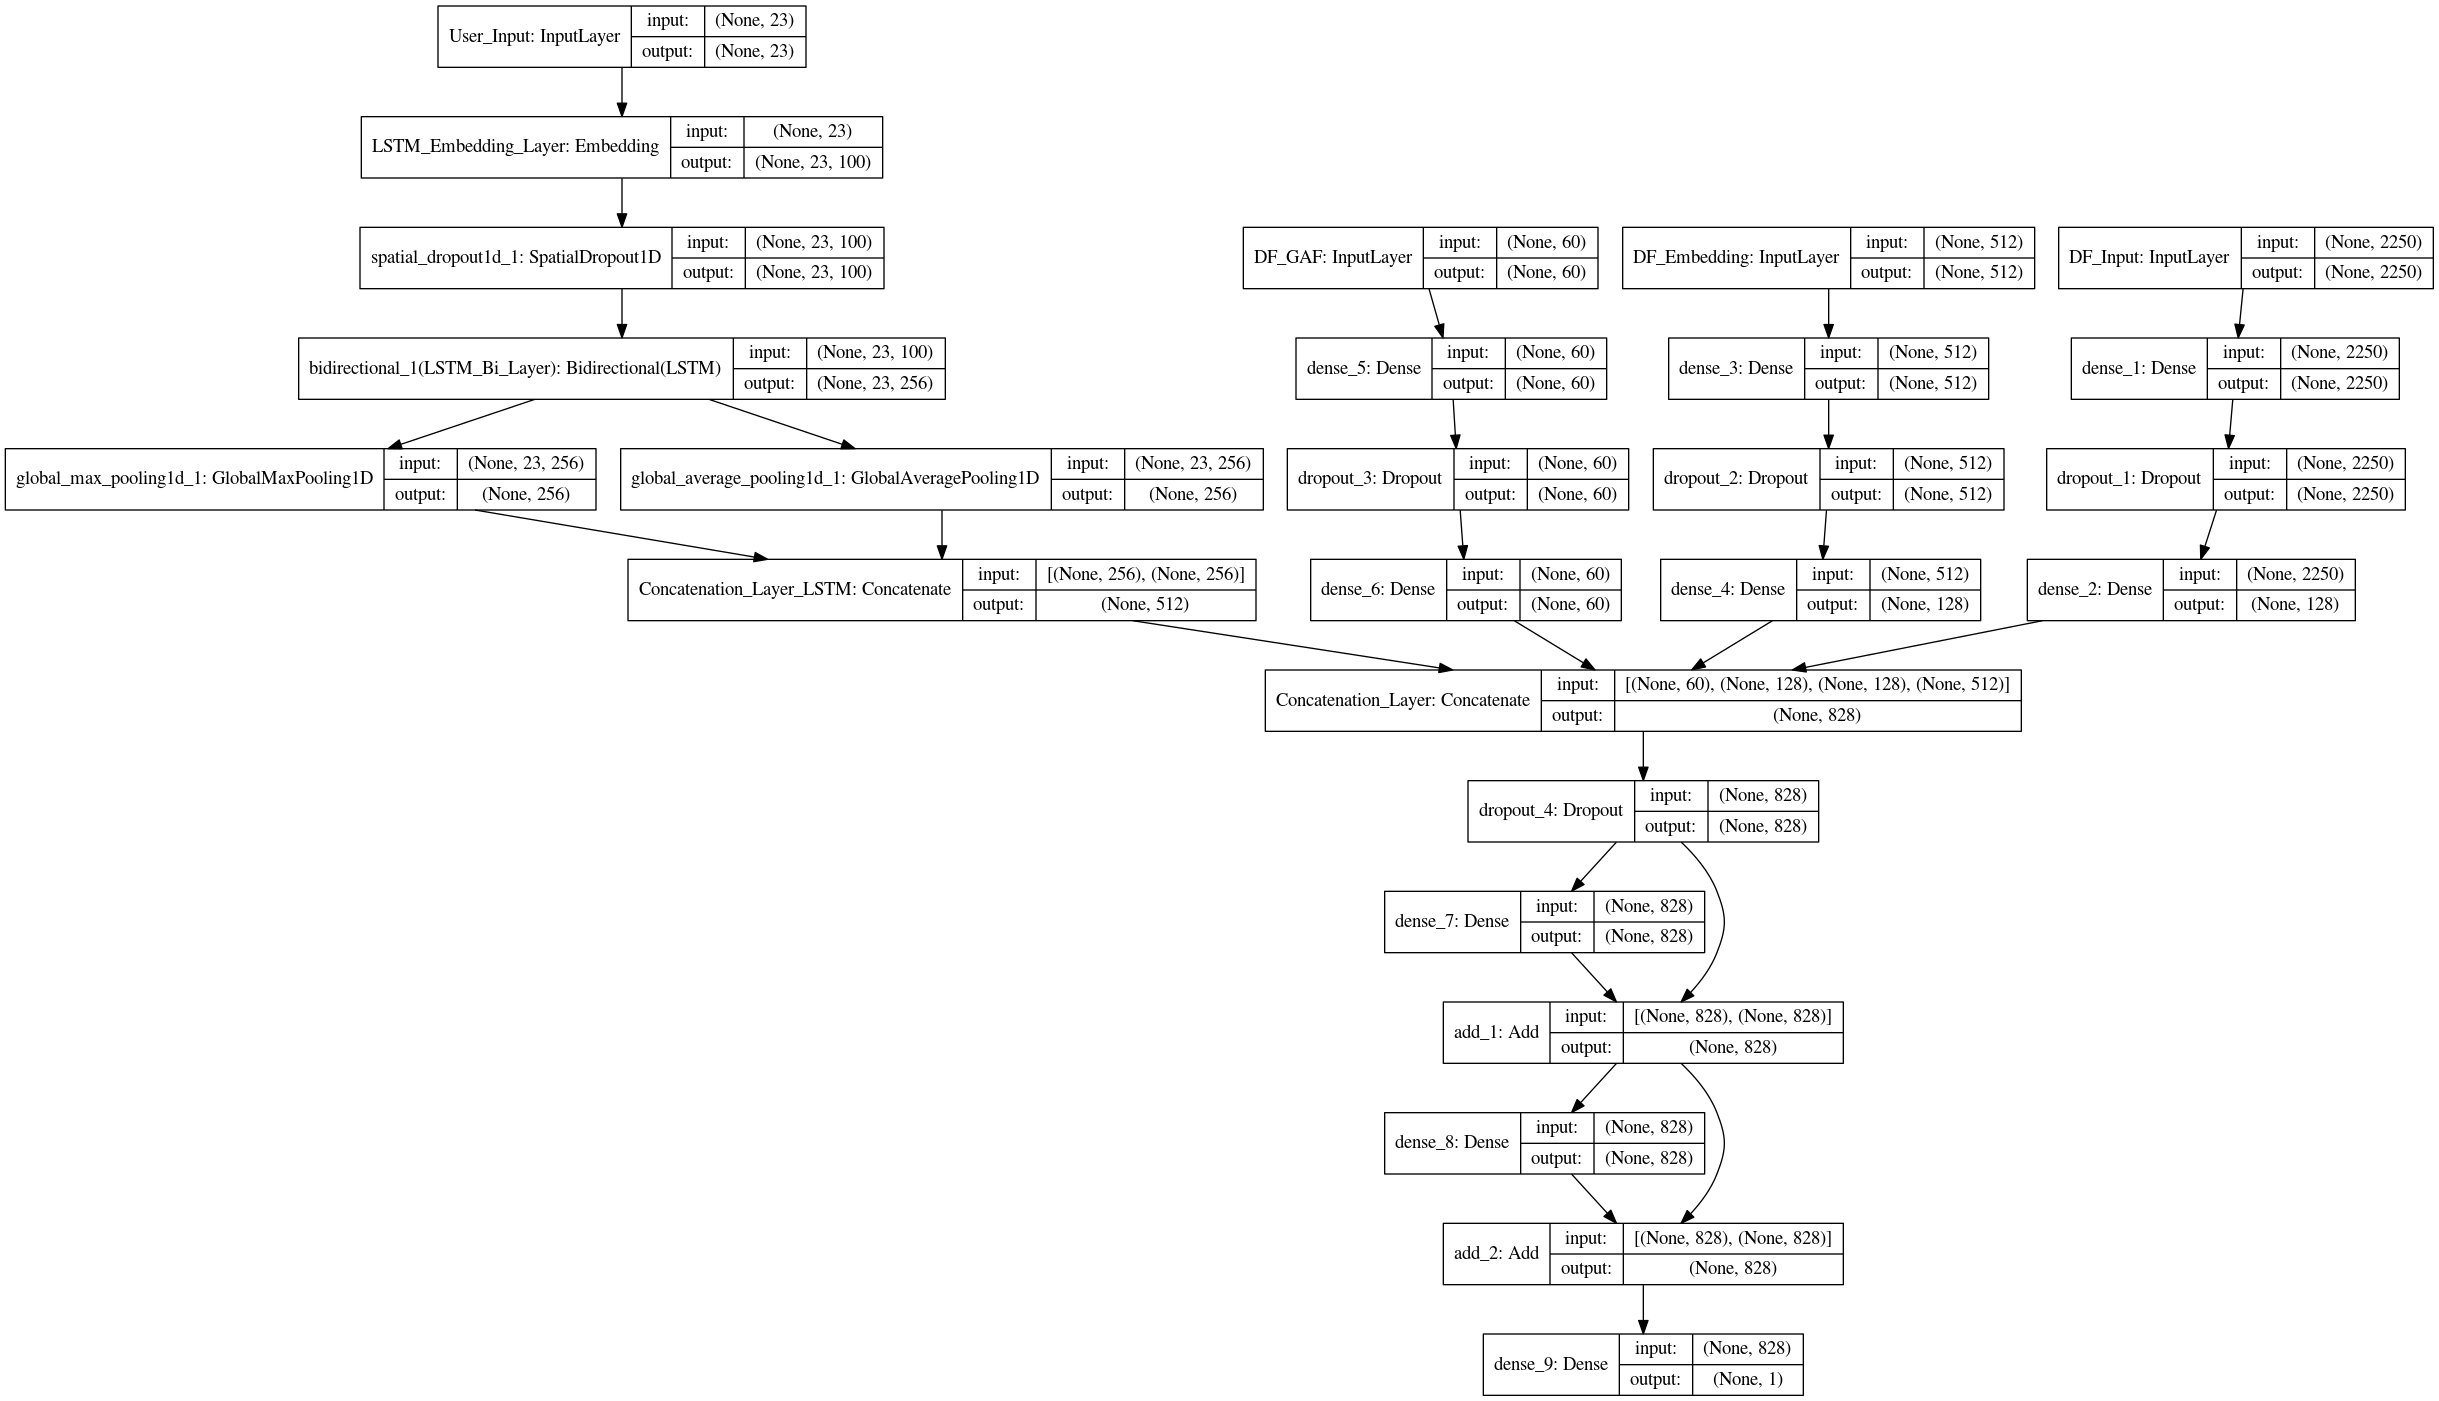

In [ ]:
# model.summary()
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2 , verbose= 1),EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=2, verbose= 1)]
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# model.fit([data.train_df_gaf , x_train_embeddings.numpy() , data.train_df , x_data] , 
#           y_data , batch_size = 128 , epochs = 5 ,validation_split = 0.1 , verbose = 1 )

In [ ]:
def func(x , thres):
    if x>thres:
        return 1
    else:
        return 0
def save_csv(df , name):
    pd.DataFrame(df).to_csv(name , index = False)
def train_model(data =data , model = model , train_data_x = [data.train_df_gaf , x_train_embeddings.numpy() , data.train_df , x_data] , train_data_y = y_data , 
                bs = BATCH_SIZE , epochs_each_step = 1 ,total_epochs = 10 ,  vd = [[data.test_df_gaf , x_test_embeddings.numpy() , data.test_df , x_test], data.leaked_data.target.values]  ,  
                verb = 2 , cbs = callbacks):
    submit = []
    for i in range(total_epochs//epochs_each_step):
        model.fit(train_data_x , train_data_y , batch_size = bs , epochs = epochs_each_step ,validation_data = vd , verbose = verb , callbacks =  cbs)
        data.submit_data['target'] = model.predict(vd[0])
        median = data.submit_data.sort_values(by = ['target'], ascending = True)['target'].values[1861]
        data.submit_data.target = data.submit_data.target.apply(func , thres = median)
#         data.submit_data.target = data.submit_data.target.round().astype(int)
        f1_s= f1_score(data.leaked_data.target , data.submit_data.target)
#         name = '/kaggle/working/disaster_submission_'+str(i)+'_f1_'+str(int(f1_s*10000))+'.h5'
        name = '/kaggle/working/disaster_submission_'+str(i)+'.h5'
        model.save(name)
        submit.append(data.submit_data)
#         data.submit_data[['id','target']].to_csv('/kaggle/working/disaster_submission_{}.csv'.format(i) , index = False)
        print("F1 Score of This Layer is ", f1_score(data.leaked_data.target , data.submit_data.target))
    return submit

In [ ]:
submit = train_model()

Train on 7554 samples, validate on 3263 samples
Epoch 1/1
 - 13s - loss: 0.5008 - accuracy: 0.7580 - mse: 0.1647 - val_loss: 0.4138 - val_accuracy: 0.8189 - val_mse: 0.1322
F1 Score of This Layer is  0.7755975740278275
Train on 7554 samples, validate on 3263 samples
Epoch 1/1
 - 11s - loss: 0.3504 - accuracy: 0.8537 - mse: 0.1074 - val_loss: 0.4320 - val_accuracy: 0.8131 - val_mse: 0.1352
F1 Score of This Layer is  0.7748840528005707
Train on 7554 samples, validate on 3263 samples
Epoch 1/1
 - 12s - loss: 0.2894 - accuracy: 0.8862 - mse: 0.0865 - val_loss: 0.4849 - val_accuracy: 0.8051 - val_mse: 0.1445
F1 Score of This Layer is  0.7720299678915447
Train on 7554 samples, validate on 3263 samples
Epoch 1/1
 - 11s - loss: 0.2262 - accuracy: 0.9141 - mse: 0.0651 - val_loss: 0.5204 - val_accuracy: 0.7999 - val_mse: 0.1513
F1 Score of This Layer is  0.7641812343917231
Train on 7554 samples, validate on 3263 samples
Epoch 1/1
 - 11s - loss: 0.1700 - accuracy: 0.9380 - mse: 0.0477 - val_loss:

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("accuracy")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(w2v_model, metric):
    plt.plot(w2v_model.w2v_model[metric])
    plt.plot(w2v_model.w2v_model['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [ ]:
submit[0].to_csv('submit_file.csv' , index = False)
submit[1].to_csv('submit_file_1.csv' , index = False)